In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To use statistical functions
import scipy.stats as stats

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

#Move file up to root
import os
os.chdir('..')


#File reader
from src.ingest_data import DataIngestorFactory

In [2]:
data_ingestor = DataIngestorFactory.get_data_ingestor('.zip') #Hardcode as we know data is saved under .zip format


In [3]:
df_train = data_ingestor.ingest("Train") #Ingest Training set

In [4]:
#Basic inspection - missing value,data type
#df_train.sample(10)
#df_train.isna().sum()

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


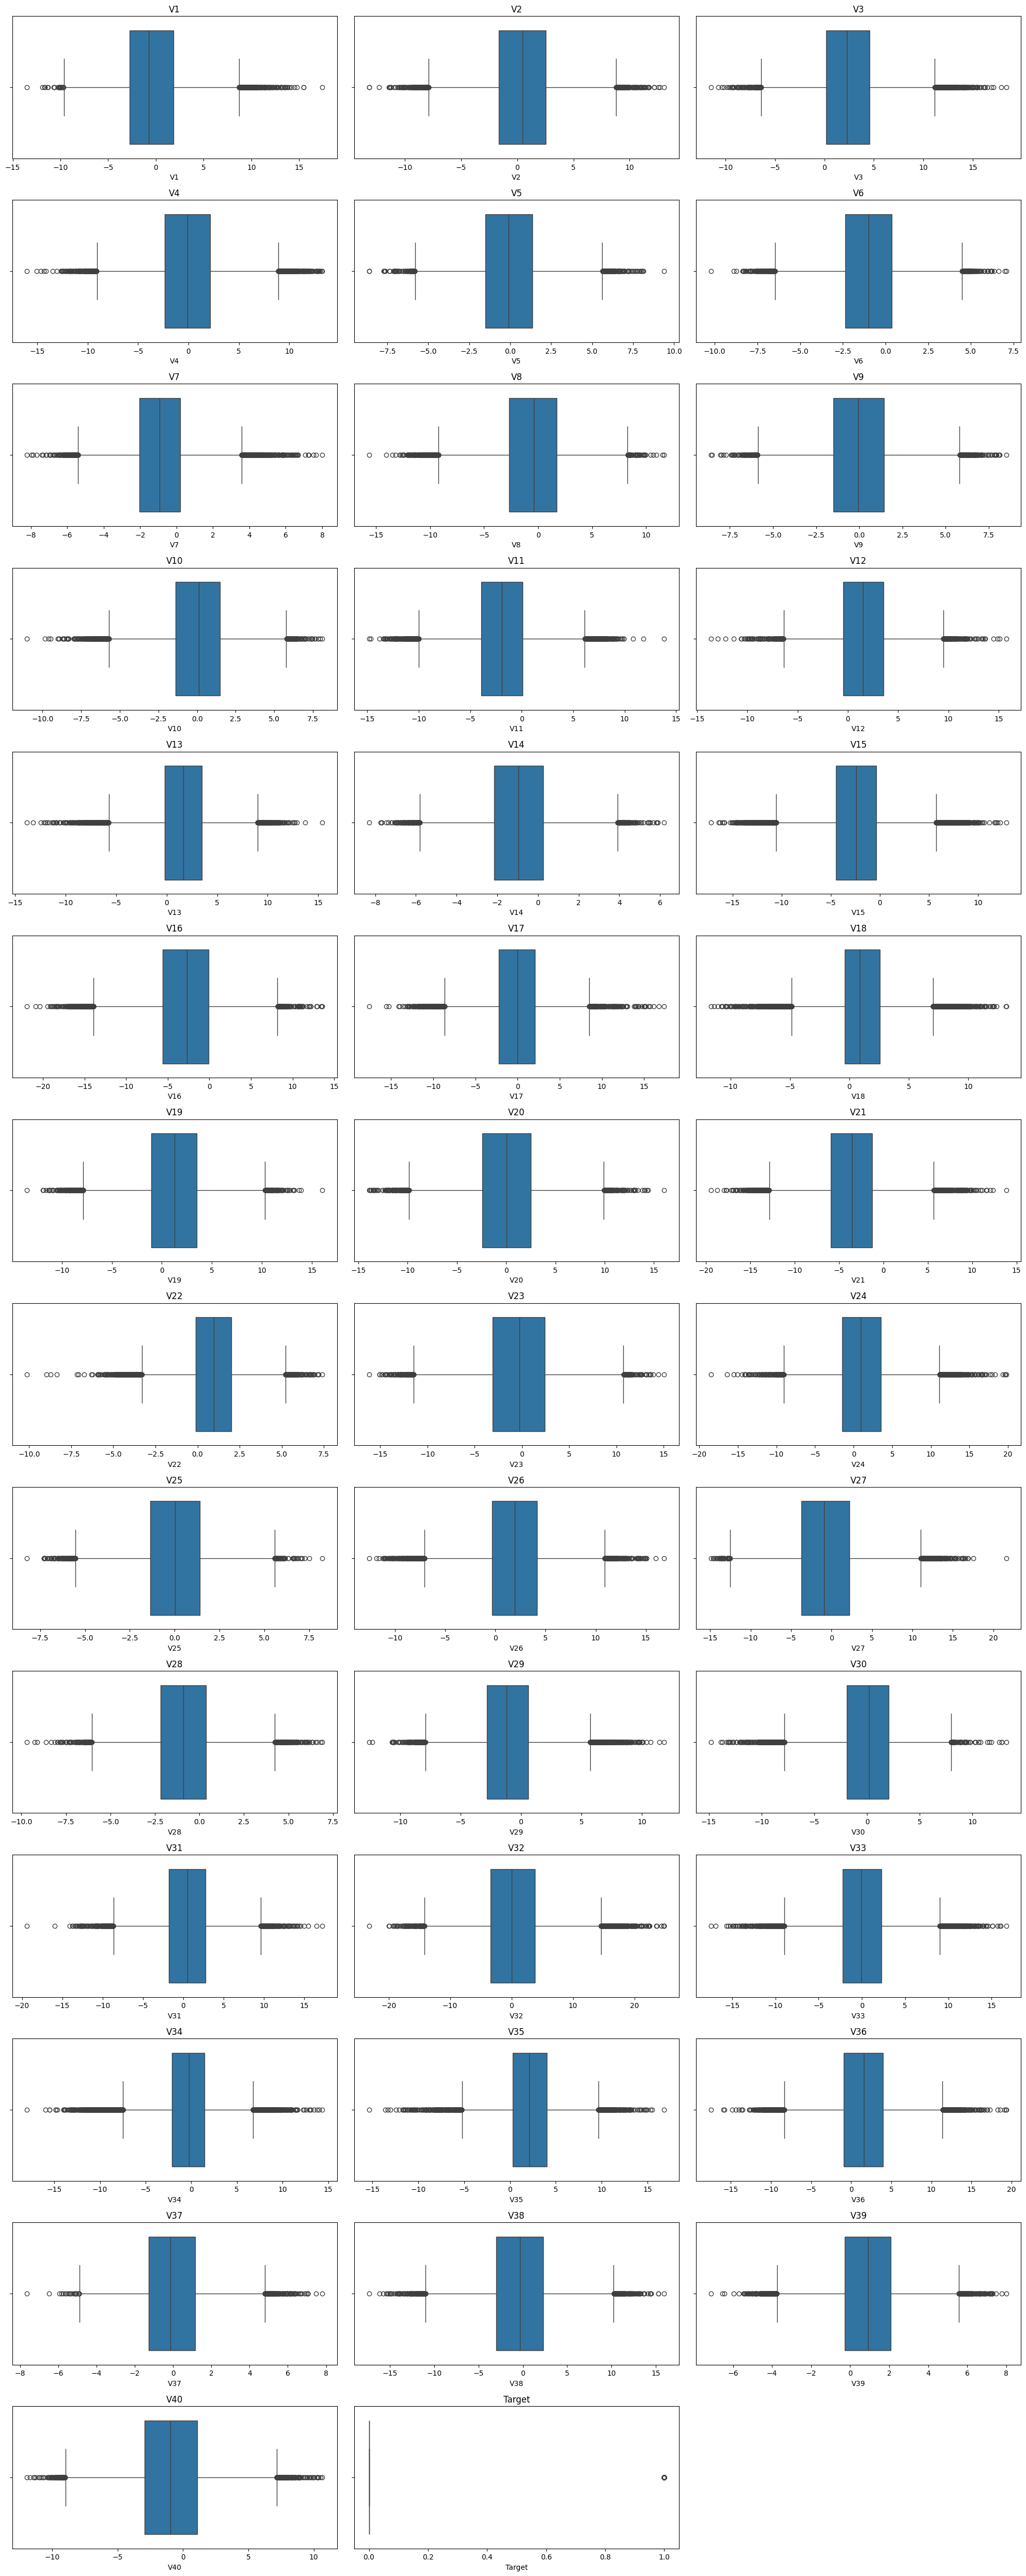

In [ ]:
#Univariable analysis
#Independent Variable
cols = df_train.columns.tolist()


plt.figure(figsize = (20,50))
for i,variable in enumerate(cols):
    plt.subplot(14,3,i+1)
    sns.boxplot(df_train[variable],orient='h')
    plt.title(variable)
plt.tight_layout()
plt.show()


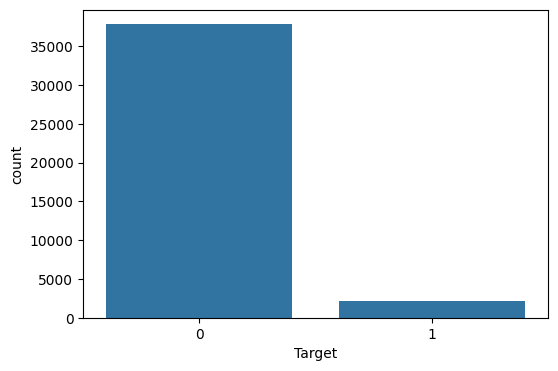

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_train["Target"])
plt.show()

In [ ]:
f"{round(df_train['Target'].value_counts()[0]/len(df_train),2)*100}% records fall under 0 and {round(df_train['Target'].value_counts()[1]/len(df_train),2)*100}% fall under 1"

'95.0% records fall under 0 and 5.0% fall under 1'